# Investigating the impact of food on climate change

Here I explore the data I downloaded from Kaggle

**What are the questions I want to answer?**

1) Is there a food source that we regulary consume that is high in CO2 production apart from meat?

2) What is the most energy intensive part of producing the foods we eat.

3) What other serious implications does food production have on our enviroment?

**Content**

This dataset contains most 43 most common foods grown across the globe and 23 columns as their respective land, water usage and carbon footprints.

**Columns**

Land use change - Kg CO2 - equivalents per kg product;

Animal Feed - Kg CO2 - equivalents per kg product;

Farm - Kg CO2 - equivalents per kg product;

Processing - Kg CO2 - equivalents per kg product;

Transport - Kg CO2 - equivalents per kg product;

Packaging - Kg CO2 - equivalents per kg product;

Retail - Kg CO2 - equivalents per kg product;

These represent greenhouse gas emissions per kg of food product(Kg CO2 - equivalents per kg product) across different stages in the lifecycle of food production.;

Eutrophication – the pollution of water bodies and ecosystems with excess nutrients – is a major environmental problem. The runoff of nitrogen and other nutrients from agricultural production systems is a leading contributor.

Acknowledgements
https://ourworldindata.org

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = '15'

In [2]:
df = pd.read_csv('Food_Production.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [3]:
df.head(5)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


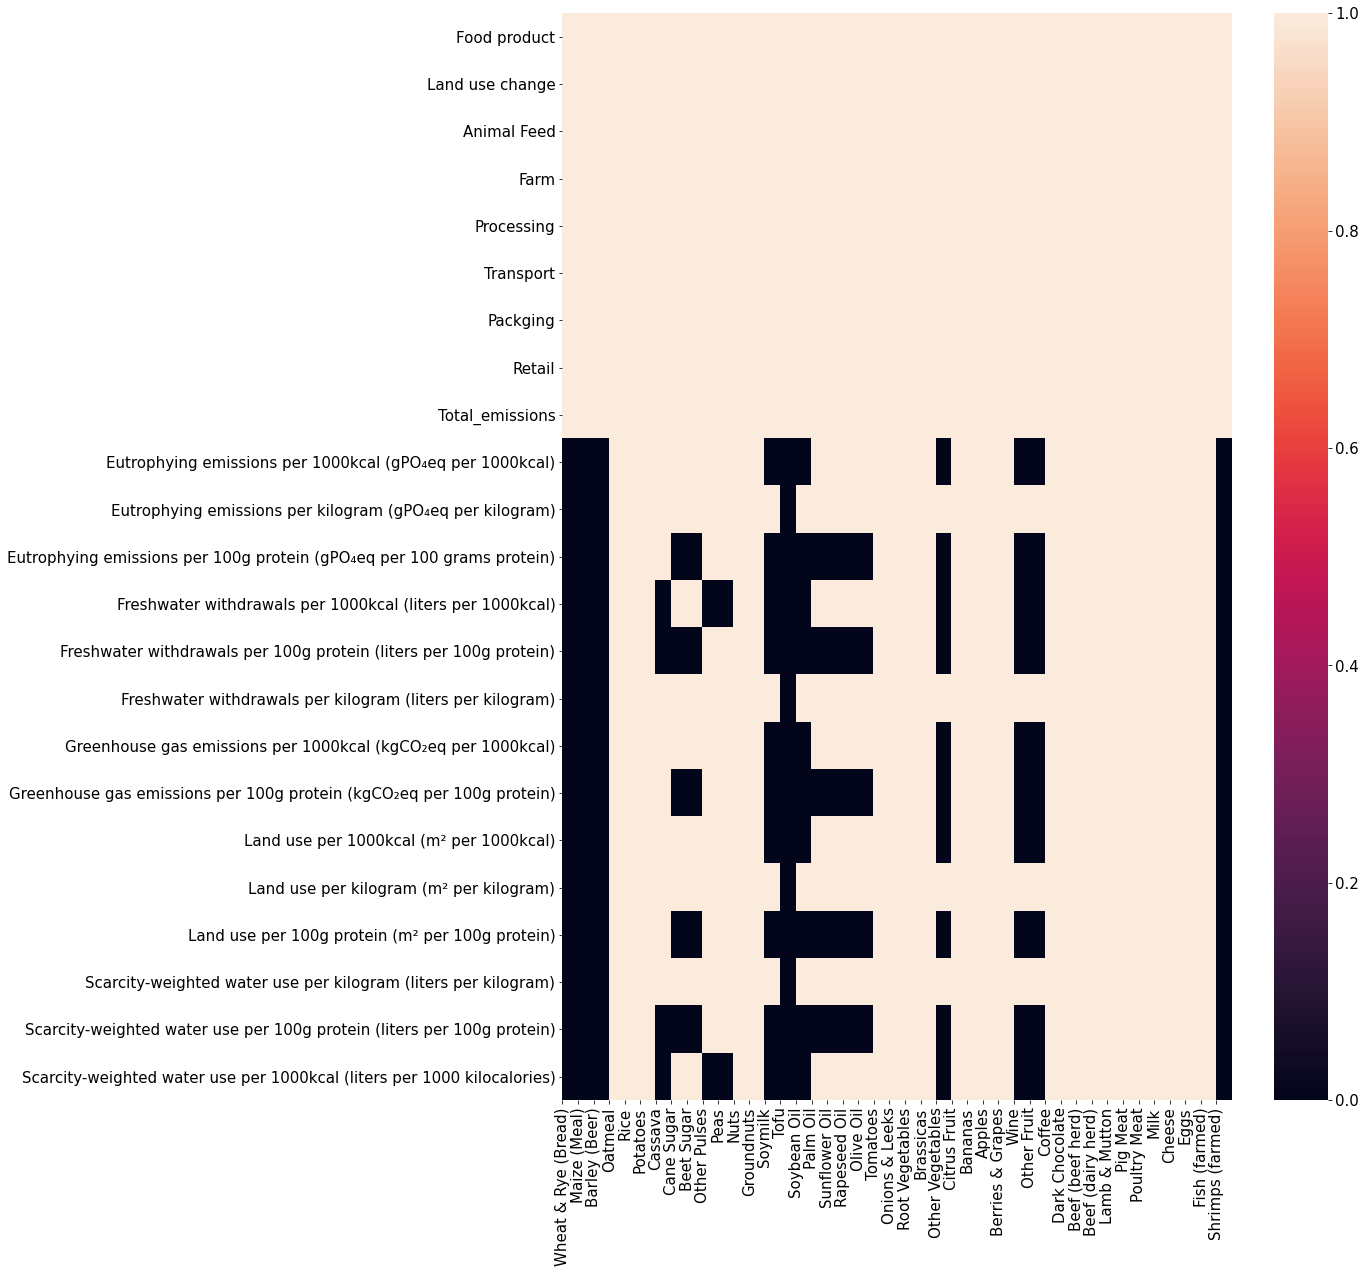

In [4]:
plt.figure(figsize=(15,20))
sns.heatmap(~df.T.isnull())
_ = plt.xticks(ticks = range(len(df['Food product'])),
               labels=df['Food product'],
               rotation=90
              )

It seems that all the values are in nominal format, so no preprossessing needed at first look.

There are a few NaN values, but this may be due to certain features not applying to food groups

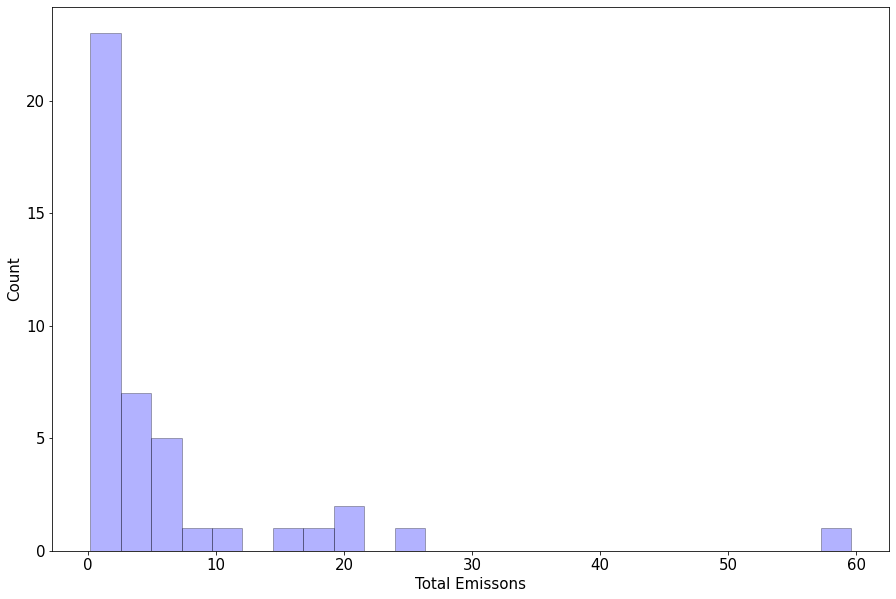

In [5]:
plt.figure(figsize=(15,10))
sns.distplot(df.Total_emissions,
            bins=25,
             kde=False,
             rug_kws={"color": "g"},
             hist_kws={"histtype": "bar", "linewidth": 1,"alpha": 0.3, "color": "b", "edgecolor":'k'})
_ = plt.xlabel('Total Emissons')
_ = plt.ylabel('Count')

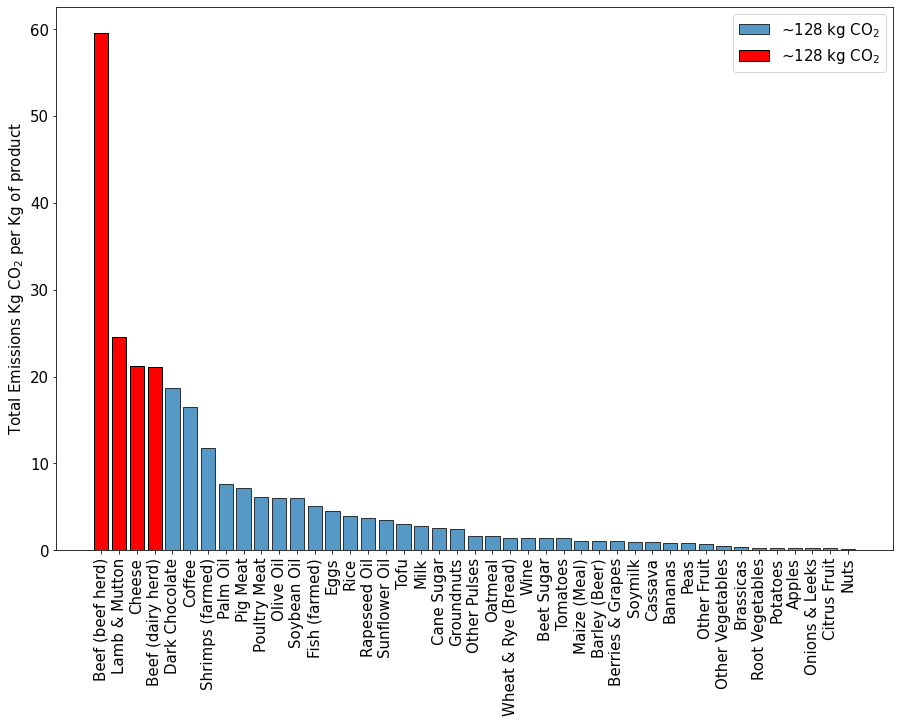

In [6]:
plt.figure(figsize=(15,10))
df_for_bar = df.sort_values('Total_emissions',ascending=False).copy()
plt.bar(df_for_bar['Food product'],df_for_bar['Total_emissions'],
        edgecolor='k',
        alpha=0.75,
        label='~{} kg CO$_2$'.format(int(df_for_bar.Total_emissions.sum()/2)))

count = 0
index = 0
df_for_bar.reset_index(inplace=True)
while count < df_for_bar.Total_emissions.sum()/2:
    count = count + df_for_bar.loc[index,'Total_emissions']
    if (count > df_for_bar.Total_emissions.sum()/2 - 5) & (count < df_for_bar.Total_emissions.sum()/2 + 5): 
        break #add in a if statement that breaks the loop if count is within an error of 5
    index += 1
    
plt.bar(df_for_bar.loc[0:index,'Food product'],df_for_bar.loc[0:index,'Total_emissions'],
        edgecolor='k',
        color='red',
        label='~{} kg CO$_2$'.format(int(df_for_bar.Total_emissions.sum()/2)))

_ = plt.xticks(rotation = 90)
_ = plt.ylabel('Total Emissions Kg CO$_2$ per Kg of product')
_ = plt.legend()

The top 4 produce the same amount of CO2 per kg as the bottom 39

In [7]:
top_ten = df.sort_values('Total_emissions',ascending=False).iloc[0:10,0:8].copy().reset_index(drop=True)

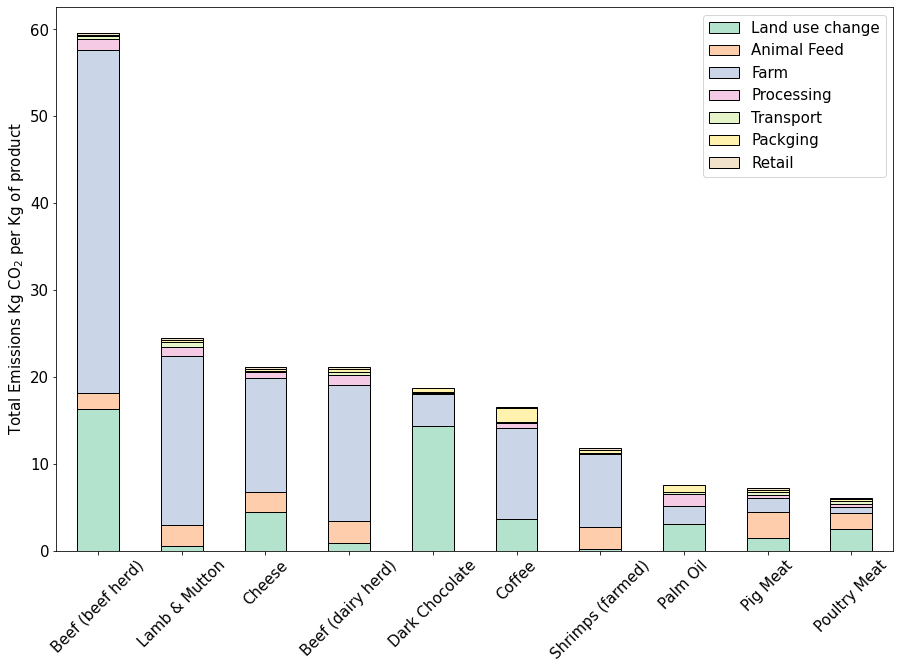

In [8]:
top_ten.plot.bar(stacked=True,figsize=(15,10),edgecolor='black', color=sns.color_palette('Pastel2',7))
_ = plt.xticks(labels = top_ten['Food product'],
               ticks = range(len(top_ten['Food product'])),
               rotation = 45)
_ = plt.ylabel('Total Emissions Kg CO$_2$ per Kg of product')
_ = plt.legend()

**We have three features referring to land use change. Lets see what impact the production of the top ten foods have on land use**

In [48]:
top_ten_land_use = df.sort_values('Total_emissions',ascending=False).iloc[0:10,[0,1,17,18,19]].copy().reset_index(drop=True)
top_ten_land_use.drop(6,axis=0,inplace=True)# dropping shrimps that don't use any land
top_ten_land_use

,Food product,Land use change,Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein)
0,Beef (beef herd),16.3,119.490842,326.21,163.595787
1,Lamb & Mutton,0.5,116.659306,369.81,184.812594
2,Cheese,4.5,22.684755,87.79,39.759964
3,Beef (dairy herd),0.9,15.838828,43.24,21.904762
4,Dark Chocolate,14.3,13.338491,68.96,137.920000
5,Coffee,3.7,38.607143,21.62,27.025000
7,Palm Oil,3.1,0.273756,2.42,NaN
8,Pig Meat,1.5,7.263598,17.36,10.729295
9,Poultry Meat,2.5,6.605405,12.22,7.055427


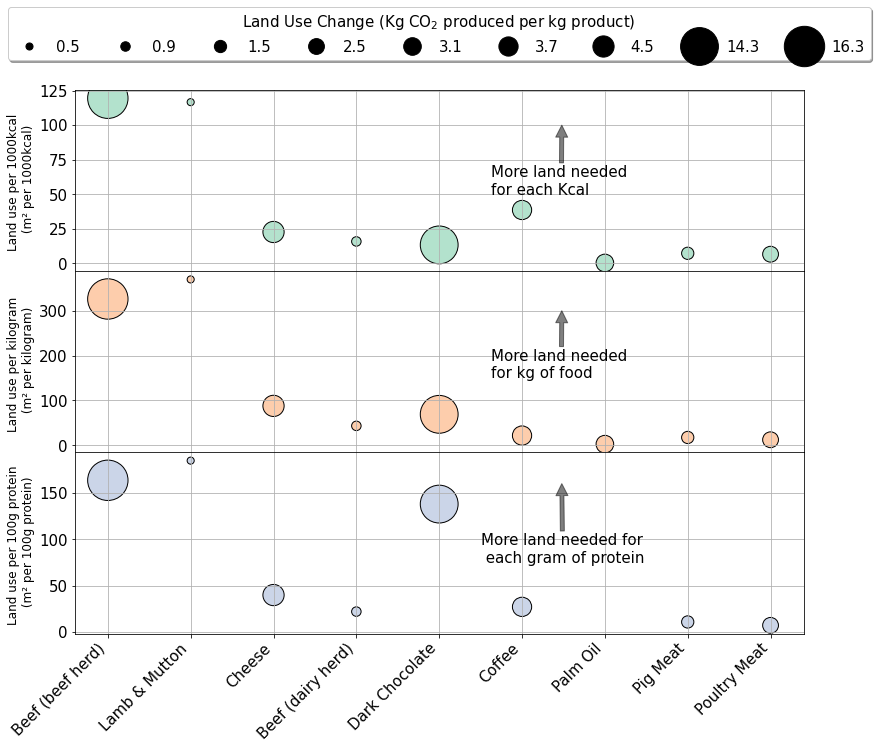

In [285]:
fig, axes = plt.subplots(3, 1,
                         sharex=True,
                         figsize=(15, 10))

plt.subplots_adjust(hspace=0, right=0.8)

cols = color=sns.color_palette('Pastel2',3)

axes[0].scatter(top_ten_land_use.iloc[:,0],top_ten_land_use.iloc[:,2],
            color=cols[0],
                ec='black',
             s=top_ten_land_use.iloc[:,1]*100,
             marker='o')

axes[1].scatter(top_ten_land_use.iloc[:,0],top_ten_land_use.iloc[:,3],
            color=cols[1],
                ec='black',
             s=top_ten_land_use.iloc[:,1]*100,
             marker='o')

sc = axes[2].scatter(top_ten_land_use.iloc[:,0],top_ten_land_use.iloc[:,4],
                color=cols[2],
                ec='black',
                s=top_ten_land_use.iloc[:,1]*100,
                marker='o')

_ =axes[2].set_xticklabels(top_ten_land_use.iloc[:,0], rotation = 45, ha="right")

_= axes[0].set_ylabel('Land use per 1000kcal \n (m² per 1000kcal)',fontsize=12)
_= axes[1].set_ylabel('Land use per kilogram \n (m² per kilogram)',fontsize=12)
_= axes[2].set_ylabel('Land use per 100g protein \n (m² per 100g protein)',fontsize=12)   

for i in range(3):
    axes[i].grid()
    
_ = axes[0].legend(labels=[str(x) for x in top_ten_land_use.iloc[:,1].sort_values()],
                   handles = sc.legend_elements('sizes')[0],
                   title='Land Use Change (Kg CO$_2$ produced per kg product)',
                   ncol=9,
                   loc='upper center',
                   bbox_to_anchor=(0.5, 1.5),
                   fancybox=True,
                   shadow=True)

_ = axes[0].annotate('More land needed \nfor each Kcal', xy=(5.48, 100), xytext=(4.625, 50),
            arrowprops=dict(facecolor='black',alpha=0.5))

_ = axes[1].annotate('More land needed \nfor kg of food', xy=(5.48, 300), xytext=(4.625, 150),
            arrowprops=dict(facecolor='black',alpha=0.5))


_ = axes[2].annotate('More land needed for\n each gram of protein', xy=(5.48, 160), xytext=(4.5, 75),
            arrowprops=dict(facecolor='black',alpha=0.5))

